# Imports

In [1]:
import scanpy as sc
from tqdm import tqdm

import sys
sys.path.append('../')
import GM

# Read adata containing structured latent

In [2]:
adata_structured = sc.read_h5ad(
    'adata_structured_balanced_count.h5ad'
)

adata = sc.AnnData(
    adata_structured.obsm['map_latent_summed'].copy(),
    obs=adata_structured.obs.copy(),
    obsm=adata_structured.obsm.copy()
)

/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/SE/miniconda3/envs/trials/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
del adata_structured

# Filter-out ambiguous cell types

In [4]:
adata = adata[adata.obs['cell_type'] != 'glial cell']

# Get tree

In [5]:
tree_results = GM.get_tree(
    adata, 
    final_level=15,
    step=None,
    cell_type_key='cell_type',

    n_comps=26,
    standardize=False,
    random_state=42,
    n_pcs=30,
    obsm_key=None,
    dynamic_comps=False,
    )

Applying PCA
Applying PCA
Applying PCA
Applying PCA
Applying PCA
Applying PCA
Applying PCA


# Plot Tree

In [ ]:
# import os
# save_path ='/data/scDisentangle figures/Intestinal/dendro'
# os.makedirs(save_path, exist_ok=True)

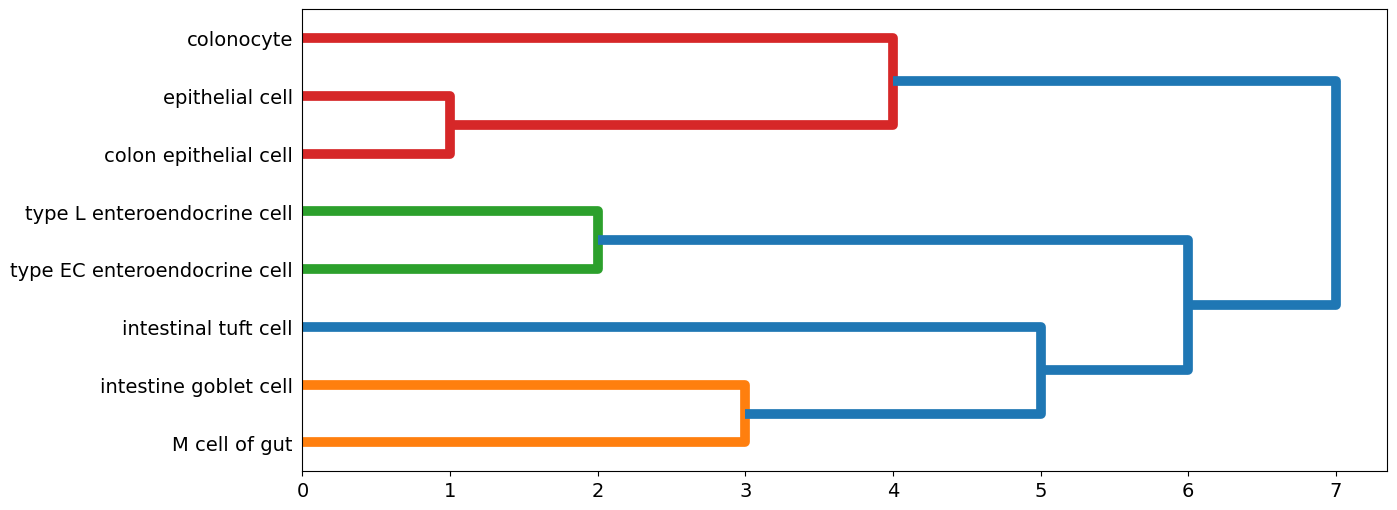

In [6]:
GM.plot_dendro(
    tree_results['linkage_mtx'], 
    tree_results['clusters'], 
    figsize=(14, 6),
    linewidth=7,
    orientation='right',
    save_path=None, 
    )

In [7]:
adata.obs['cell_type'].unique()

['M cell of gut', 'intestinal tuft cell', 'type L enteroendocrine cell', 'type EC enteroendocrine cell', 'epithelial cell', 'intestine goblet cell', 'colonocyte', 'colon epithelial cell']
Categories (8, object): ['epithelial cell', 'type EC enteroendocrine cell', 'M cell of gut', 'type L enteroendocrine cell', 'colon epithelial cell', 'intestine goblet cell', 'intestinal tuft cell', 'colonocyte']